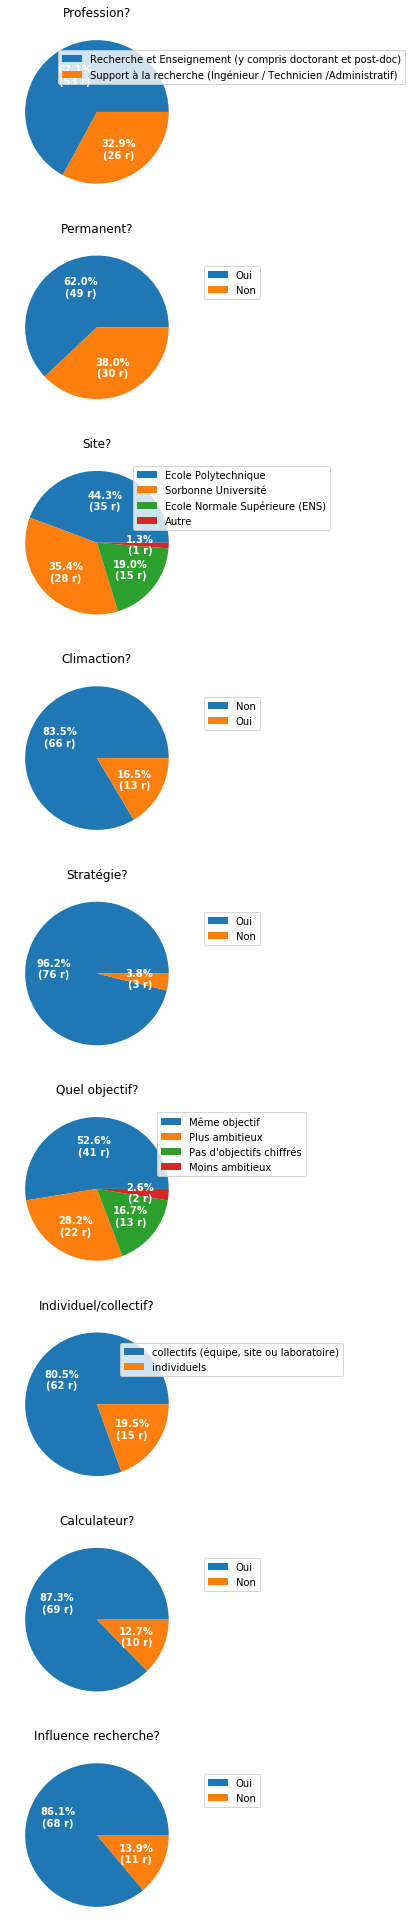

In [253]:
#from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as plt
import pandas as pd
import numpy as np

def savefig(fig,ax,pathfig,name='',title='',fts=15,xsize=(4,5),zmax=None):
    plt.xticks(size=fts)
    plt.yticks(size=fts)
    plt.title(title)
    tl.mkdir(pathfig)
    fig.set_size_inches(xsize)
    print(pathfig,title)
    fig.savefig(pathfig+name + '.png')#,dpi='figure')
    fig.savefig(pathfig+name + '.pdf', dpi=1000)
    plt.close()
    
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} r)".format(pct, absolute)


df = pd.read_csv('Reponse_FR.csv')

# Make a selection !!
# Subset
said_yes = df[df['Votre poste est-il permanent ?'] == 'Oui']
#df       = said_yes

pies     = [1,2,3,4,5,6,8,17,18]
New_name = ['Profession?', 'Permanent?', 'Site?', 'Climaction?','Stratégie?','Quel objectif?',
            'Individuel/collectif?','Calculateur?','Influence recherche?']

fig, ax = plt.subplots(len(pies),figsize=(30, 35), subplot_kw=dict(aspect="equal"))
#fig.set_size_inches(10, 5) #width, height

for ij,nbpie in enumerate(pies): #range(nbpies):
    data = df[questions[nbpie]].value_counts()#normalize=True)
    wedges, texts, autotexts = ax[ij].pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))
    
    ax[ij].legend(wedges, data.index,
          loc="center",
          bbox_to_anchor=(1, 1, 0.5, -0.5))
          #title=questions[1],
    plt.setp(autotexts, size=10, weight="bold")
    ax[ij].set_title(New_name[ij]) #questions[ij+1])

plt.show()




In [254]:
print(df[questions[10]].str.contains('Missions').value_counts())
print(df[questions[10]].str.contains('Campagnes').value_counts())
print(df[questions[10]].str.contains('Calcul').value_counts())
print(df[questions[10]].str.contains('Achats').value_counts())
print(df[questions[10]].str.contains('Déplacements').value_counts())

True     61
False    17
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
False    49
True     29
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64


Missions (hors campagnes de terrain)    61
Calcul et stockage numérique            49
Bâtiments/chauffage/climatisation       47
Campagnes de terrain                    29
Déplacements domicile/travail           22
Achats                                  11
dtype: int64


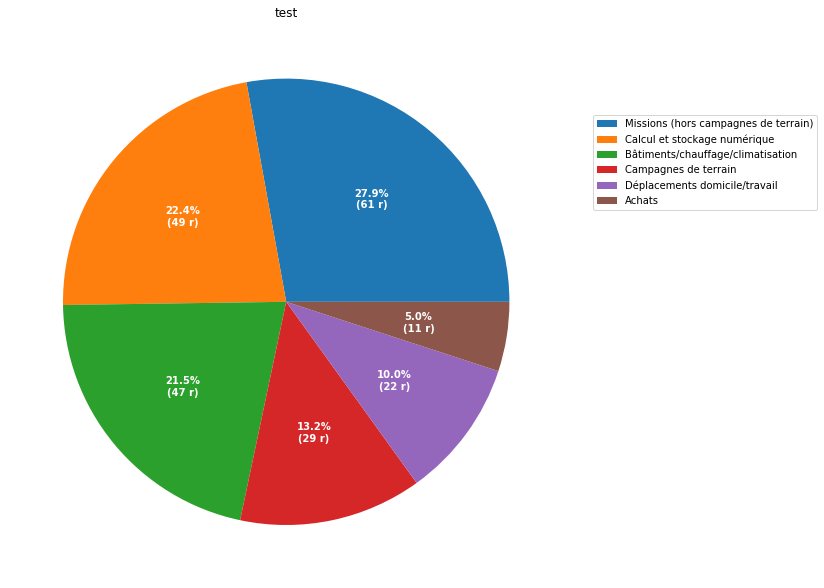

In [277]:
new_df=df[questions[10]].str.split(';', expand=True)
emission=new_df.stack().value_counts()
#new_df.stack().value_counts().plot(kind='bar', figsize=(15,7), color="#61d199")``

#for ij,nbpie in enumerate([10]): #range(nbpies):
data = emission #df[questions[nbpie]].value_counts()#normalize=True)
data = data[data>1]
print(data)
fig, ax = plt.subplots(1,figsize=(10, 15), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))
ax.legend(wedges, data.index,
      loc="center",
      bbox_to_anchor=(1, 1, 0.5, -0.5))
      #title=questions[1],
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('test') #questions[ij+1])

plt.show()

In [93]:
df.shape
questions=df.columns.values
print(questions)

['Horodateur' 'Quel est votre profession ?'
 'Votre poste est-il permanent ?'
 'Sur quel site travaillez-vous majoritairement ?'
 'Etes-vous impliqué(e) dans le groupe LMD-Climactions ?'
 "Le LMD doit-il définir une stratégie de réduction d'émissions ?"
 "Comment devons-nous nous situer par rapport à l'objectif national de réduction d'émissions pour l'horizon 2030 (-50% en 2030 par rapport à notre bilan carbone de 2019) ?"
 'Par quels moyens/modalités ? (choix multiples) '
 "Si le LMD se fixe des plafonds d'émissions ou de coût carbone, doivent-ils être :"
 "Avez-vous une remarque sur les moyens d'actions d'une stratégie de réduction des émissions?"
 'Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?'
 "Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Missions (hors campagnes de terrain)]"
 "Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Campagnes de terrain]"
 "Selon vous, est-ce qu'une éventuelle stra

In [60]:
print('Nombre de réponses : ',df.shape[0])

Nombre de réponses :  79


In [61]:
df.head()

,Horodateur,Quel est votre profession ?,Votre poste est-il permanent ?,Sur quel site travaillez-vous majoritairement ?,Etes-vous impliqué(e) dans le groupe LMD-Climactions ?,Le LMD doit-il définir une stratégie de réduction d'émissions ?,Comment devons-nous nous situer par rapport à l'objectif national de réduction d'émissions pour l'horizon 2030 (-50% en 2030 par rapport à notre bilan carbone de 2019) ?,Par quels moyens/modalités ? (choix multiples),"Si le LMD se fixe des plafonds d'émissions ou de coût carbone, doivent-ils être :",Avez-vous une remarque sur les moyens d'actions d'une stratégie de réduction des émissions?,...,"Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Missions (hors campagnes de terrain)]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Campagnes de terrain]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Calcul et stockage numérique]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Achats]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Bâtiments/chauffage/climatisation]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Déplacements domicile/travail]",Seriez-vous intéressé par un calculateur qui vous permettrait d'estimer et de suivre sur l'année votre empreinte individuelle professionnelle dans ces différents domaines d’émissions ?,Pensez-vous que votre activité professionnelle puisse être d'aussi bonne qualité à moindre impact carbone ? (espace commentaire ci-dessous),Avez-vous des remarques sur ce point spécifiquement ?,Avez-vous des commentaires/questions/suggestions de manière générale sur une stratégie de réduction d'émissions au LMD ?
0,2021/03/25 3:46:39 PM UTC+2,Recherche et Enseignement (y compris doctorant...,Non,Ecole Polytechnique,Oui,Oui,Même objectif,Sensibilisation / bonnes pratiques / volontari...,"collectifs (équipe, site ou laboratoire)",NaN,...,Ne pas toucher,Ne pas toucher,Ne pas toucher,Plutôt pas d'accord,Plutôt d'accord,Plutôt d'accord,Oui,Oui,NaN,NaN
1,2021/03/25 3:48:09 PM UTC+2,Support à la recherche (Ingénieur / Technicien...,Oui,Ecole Polytechnique,Non,Oui,Même objectif,En se fixant des plafonds d'émissions ou de co...,"collectifs (équipe, site ou laboratoire)",NaN,...,Plutôt d'accord,Ne pas toucher,Plutôt d'accord,Plutôt d'accord,Priorité,Plutôt pas d'accord,Oui,Oui,NaN,NaN
2,2021/03/25 3:48:42 PM UTC+2,Support à la recherche (Ingénieur / Technicien...,Non,Ecole Polytechnique,Non,Oui,Plus ambitieux,Sensibilisation / bonnes pratiques / volontari...,"collectifs (équipe, site ou laboratoire)",Organisation en distanciel pour toutes les con...,...,Priorité,Plutôt d'accord,Plutôt d'accord,Plutôt d'accord,Priorité,Priorité,Oui,Oui,NaN,NaN
3,2021/03/25 3:49:18 PM UTC+2,Recherche et Enseignement (y compris doctorant...,Oui,Ecole Polytechnique,Non,Oui,Même objectif,Sensibilisation / bonnes pratiques / volontariat,NaN,NaN,...,Plutôt d'accord,Plutôt pas d'accord,Plutôt d'accord,Plutôt d'accord,Priorité,Plutôt d'accord,Oui,Oui,NaN,NaN
4,2021/03/25 3:49:24 PM UTC+2,Recherche et Enseignement (y compris doctorant...,Non,Ecole Normale Supérieure (ENS),Non,Oui,Plus ambitieux,Sensibilisation / bonnes pratiques / volontari...,"collectifs (équipe, site ou laboratoire)",NaN,...,Priorité,Plutôt d'accord,Plutôt d'accord,Priorité,Priorité,Plutôt d'accord,Oui,Oui,NaN,NaN


In [62]:
df['Quel est votre profession ?'].value_counts(normalize=True)

Recherche et Enseignement (y compris doctorant et post-doc)       0.670886
Support à la recherche (Ingénieur / Technicien /Administratif)    0.329114
Name: Quel est votre profession ?, dtype: float64

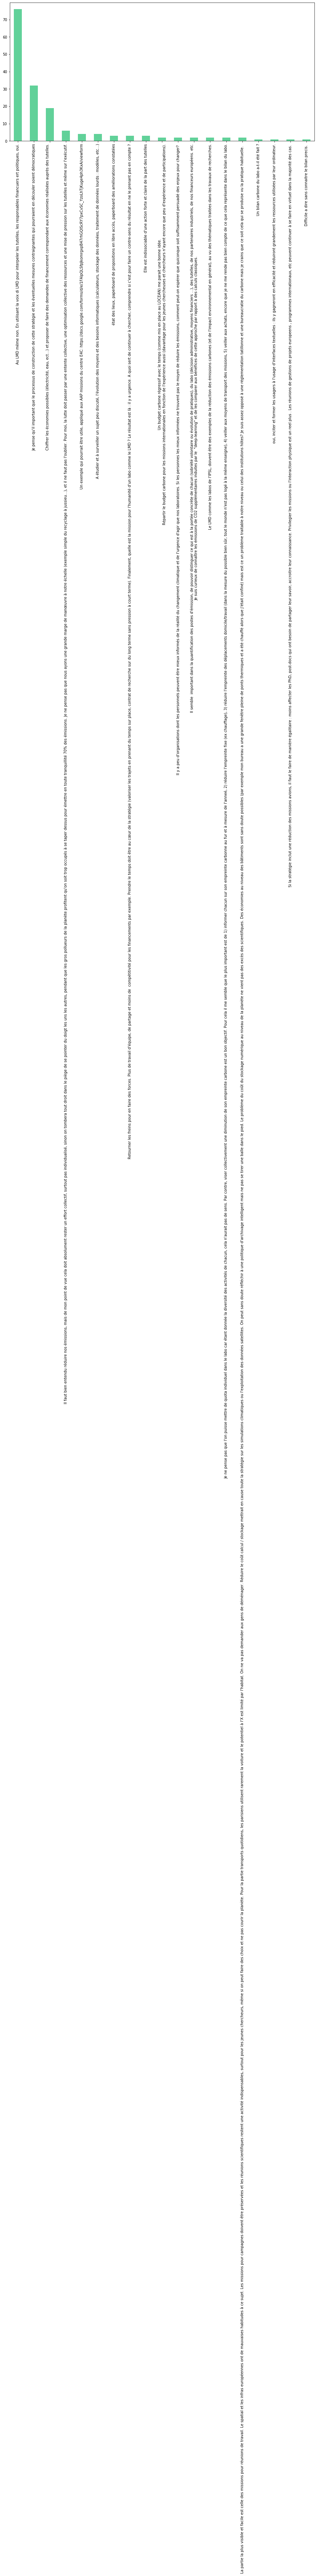

In [96]:
#%matplotlib inline
for ij in questions:
  df[ij].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

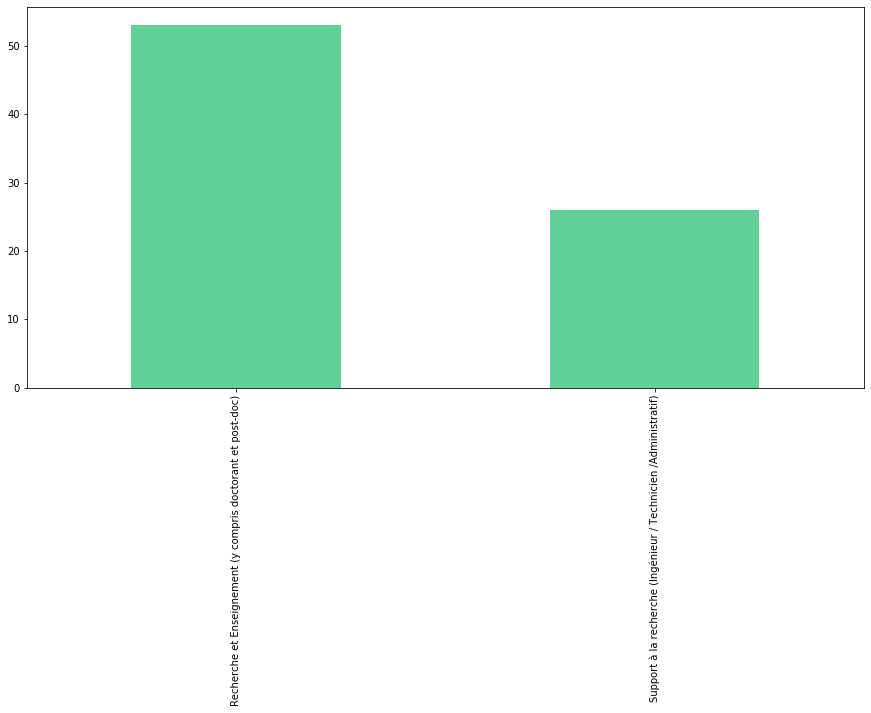

In [98]:
%matplotlib inline
df[questions[1]].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

In [31]:
said_yes = df[df['Votre poste est-il permanent ?'] == 'Oui']
said_no = df[df['Votre poste est-il permanent ?'] == 'Non']
said_no.shape

(30, 21)

Oui    0.816327
Non    0.183673
Name: Pensez-vous que votre activité professionnelle puisse être d'aussi bonne qualité à moindre impact carbone ? (espace commentaire ci-dessous), dtype: float64


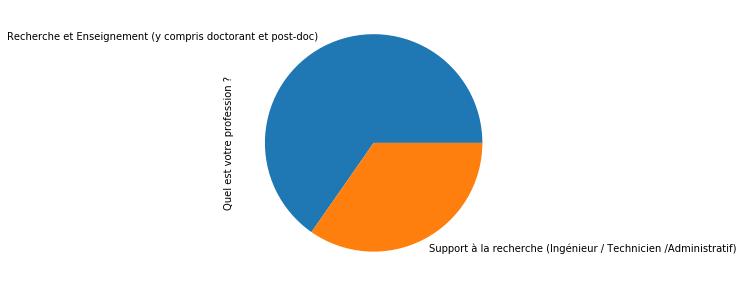

In [133]:
%matplotlib inline
print(said_yes[questions[-3]].value_counts(normalize=True))
#said_yes[questions[1]].value_counts(normalize=True).plot(kind="bar", figsize=(15,7), color="#61d199")
plot = said_yes[questions[1]].value_counts(normalize=True).plot.pie(subplots=True, figsize=(5, 5))